In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('COVID_Data_Small.xlsx')

In [3]:
df.head(10)

,Arrival_Date,AgeYears,Temperature,BMI,AvgReading_Neuts_pct,Respiration_Rate,HasConnectiveTissueDisorderFLG,O2_Saturation,MaleFLG,Outcome_48Hours_Dispo,Rand
0,2020-05-28,75.833333,98.0,36.30,75.6,98,1,99,1,0,0.055920
1,2020-03-10,0.916667,102.0,34.60,71.2,70,0,98,0,1,0.112461
2,2020-05-29,61.083333,97.5,25.30,68.4,61,1,99,1,0,0.031409
3,2020-05-11,56.166667,97.9,30.30,96.5,56,0,98,1,1,0.720525
4,2020-06-19,41.916667,97.0,34.10,53.7,56,0,100,0,0,0.047407
5,2020-05-06,58.083333,98.6,27.90,71.6,52,0,100,1,1,0.509095
6,2020-06-16,0.000000,98.5,11.10,23.3,52,0,97,1,0,0.008422
7,2020-05-06,52.083333,98.4,22.70,92.8,51,0,100,0,1,0.852088
8,2020-06-17,41.083333,96.8,39.26,62.4,51,0,97,1,0,0.083679
9,2020-04-16,34.416667,100.0,29.40,88.0,50,1,94,1,1,0.582169


In [4]:
print(f'Total number of NAN values in data frame is: {df.isna().sum().sum()}')
print(f'Data frame has {df.shape[0]} rows and {df.shape[1]} columns')

Total number of NAN values in data frame is: 0
Data frame has 6004 rows and 11 columns


In [5]:
column_mean = df.drop('Arrival_Date', axis=1).mean() # creation pandas series of mean values of each column
column_mean

,0
AgeYears,57.190734
Temperature,98.263175
BMI,29.607080
AvgReading_Neuts_pct,70.416039
Respiration_Rate,19.455696
HasConnectiveTissueDisorderFLG,0.323784
O2_Saturation,97.106929
MaleFLG,0.500500
Outcome_48Hours_Dispo,0.392572
Rand,0.223282


In [6]:
df = df.replace('?', np.nan) # check if any '?' or spaces are presented
df = df.replace(' ', np.nan)
df.isna().sum().sum()

0

In [7]:
num_cols = ['AgeYears',	'Temperature',	'BMI', 'AvgReading_Neuts_pct', 'Respiration_Rate', 'O2_Saturation', 'Rand'] # numerical features
cat_cols = ['HasConnectiveTissueDisorderFLG', 'MaleFLG'] # categorical features
feature_cols = num_cols + cat_cols # all features except target column
target_col = 'Outcome_48Hours_Dispo' # target column
all_cols = feature_cols + [target_col]

# Statictics of numeric features:

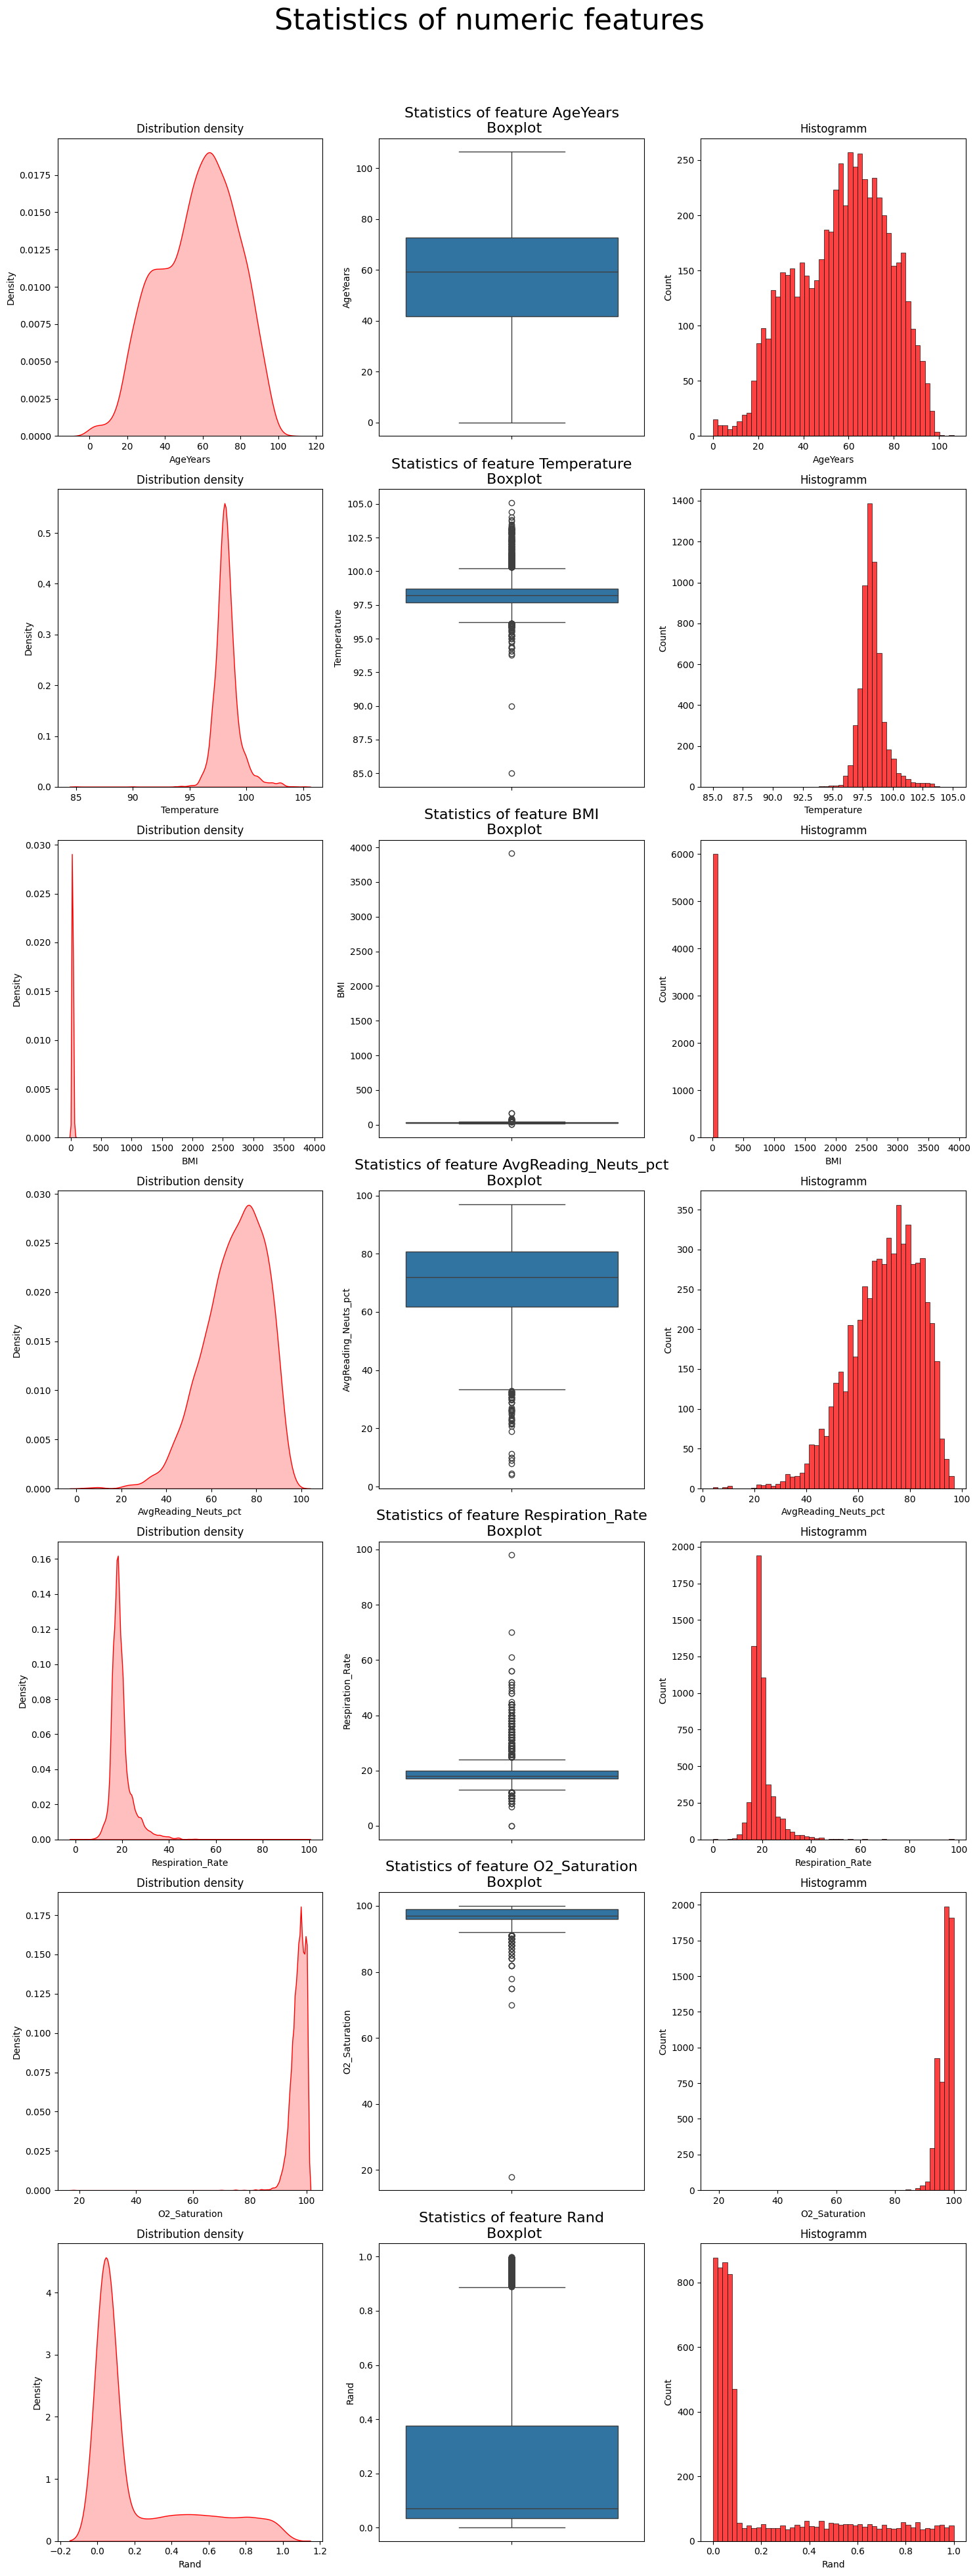

In [ ]:
fig, axes = plt.subplots(len(num_cols), 3, figsize=(15, 40))

for x in range(len(num_cols)):
  sns.kdeplot(data=df[num_cols[x]], fill = True, color='red', ax=axes[x][0])
  axes[x][0].set_title('Distribution density')

  sns.boxplot(data=df[num_cols[x]], ax=axes[x][1])
  axes[x][1].set_title('Boxplot')

  sns.histplot(data=df[num_cols[x]], bins=50, color='red', ax=axes[x][2])
  axes[x][2].set_title('Histogramm')

  axes[x][1].set_title(f'Statistics of feature {num_cols[x]}\n Boxplot', fontsize=16)

  fig.suptitle(f'Statistics of numeric features', fontsize=32)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## We can see some abnormalities in the data. For instance BMI index around 4000 is not outlier, it is mistake as well. Also body temperature around 85 or 90 (29 and 32 Celcius, respectively) is also mistake more likely. Then respiratory rate 0 define death, RR 100 is also imposible value. O_2 saturation below 20% also imposible, and should consider as mistake.

## This errors can significantly distorn statictics, so they should be removed from data:

In [8]:
df = df[df['BMI'] < 100]
df = df[(df['Temperature'] > 93) & (df['Temperature'] < 110)]
df = df[(df['Respiration_Rate'] > 6) & (df['Respiration_Rate'] < 70)]
df = df[df['O2_Saturation'] > 55]

# Result of filtration:

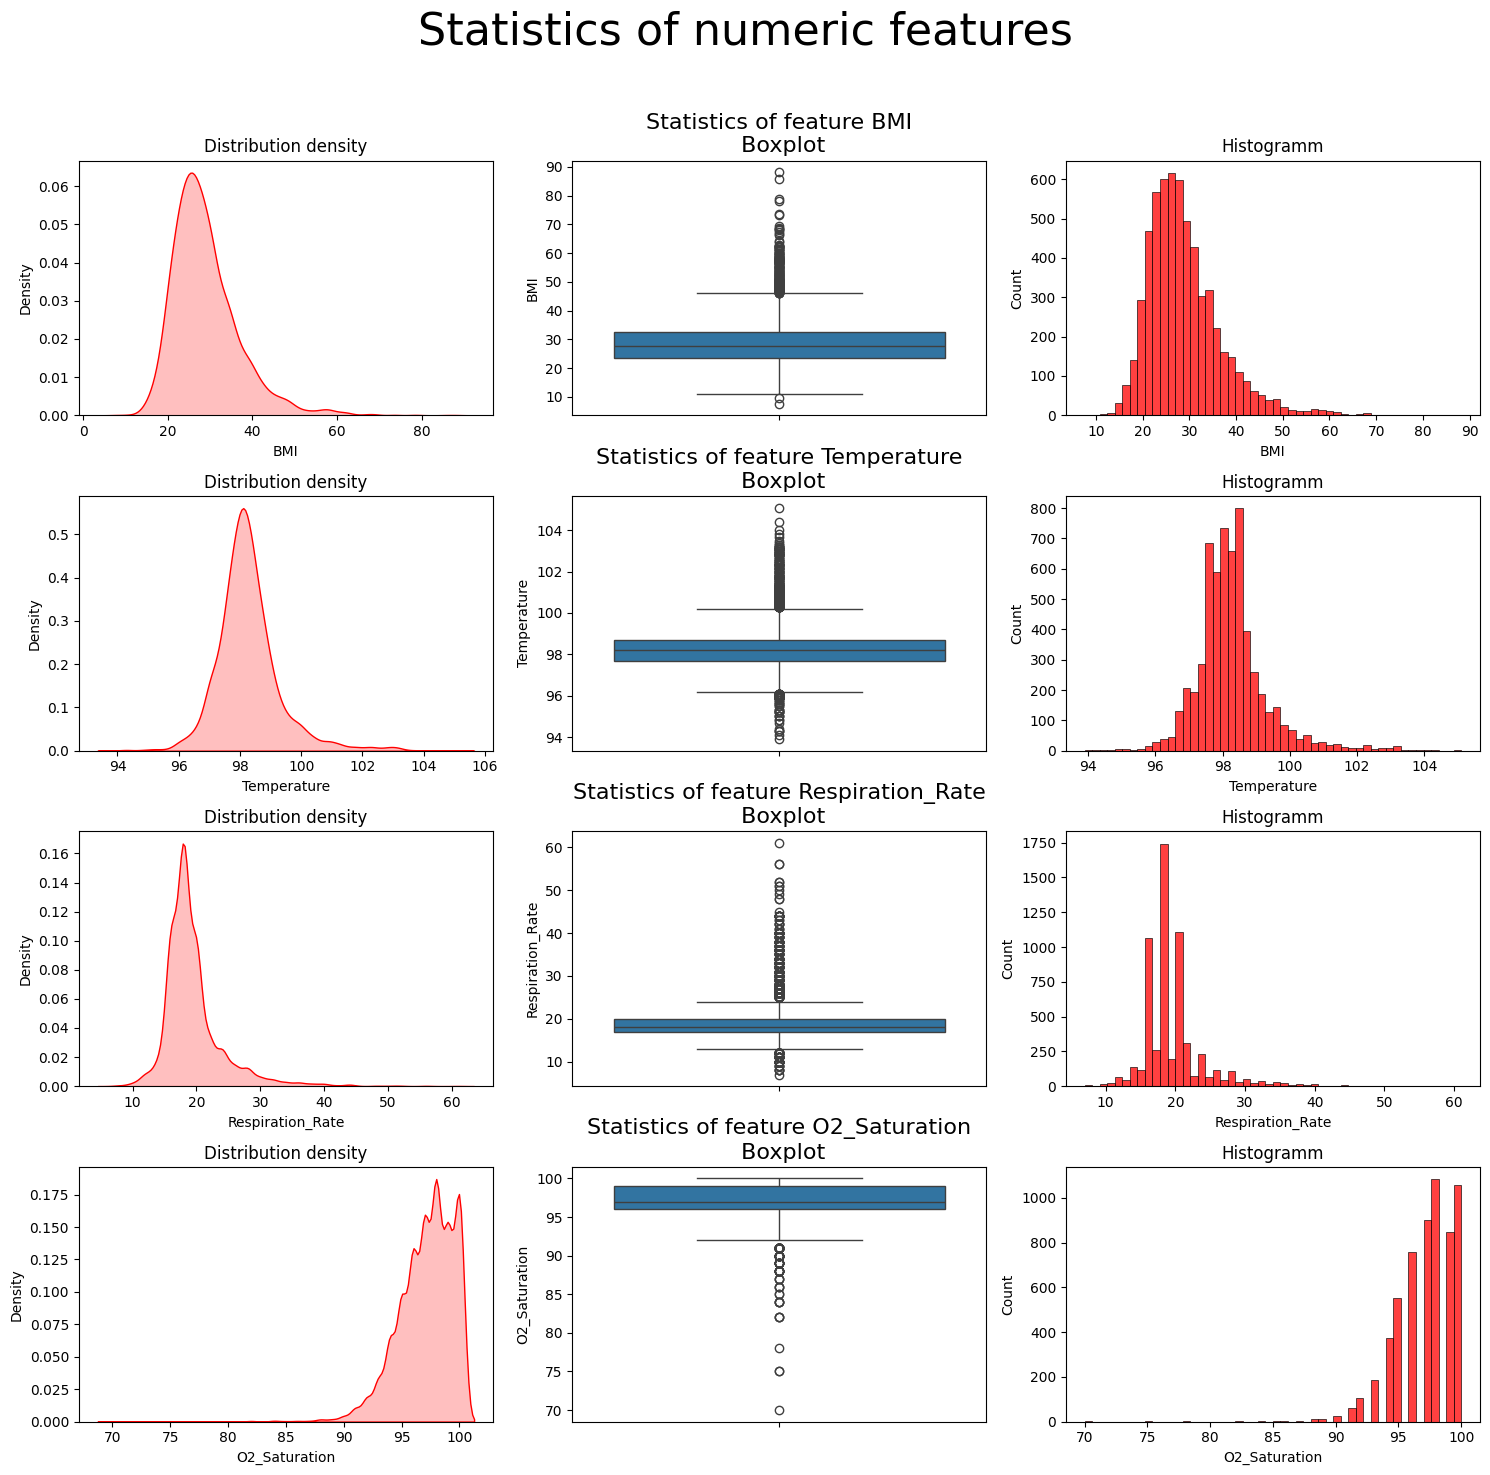

In [ ]:
filtered_features = ['BMI', 'Temperature', 'Respiration_Rate', 'O2_Saturation']
fig, axes = plt.subplots(len(filtered_features), 3, figsize=(15, 15))

for x in range(len(filtered_features)):
  sns.kdeplot(data=df[filtered_features[x]], fill = True, color='red', ax=axes[x][0])
  axes[x][0].set_title('Distribution density')

  sns.boxplot(data=df[filtered_features[x]], ax=axes[x][1])
  axes[x][1].set_title('Boxplot')

  sns.histplot(data=df[filtered_features[x]], bins=50, color='red', ax=axes[x][2])
  axes[x][2].set_title('Histogramm')

  axes[x][1].set_title(f'Statistics of feature {filtered_features[x]}\n Boxplot', fontsize=16)

  fig.suptitle(f'Statistics of numeric features', fontsize=32)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Statistics of categorical features:

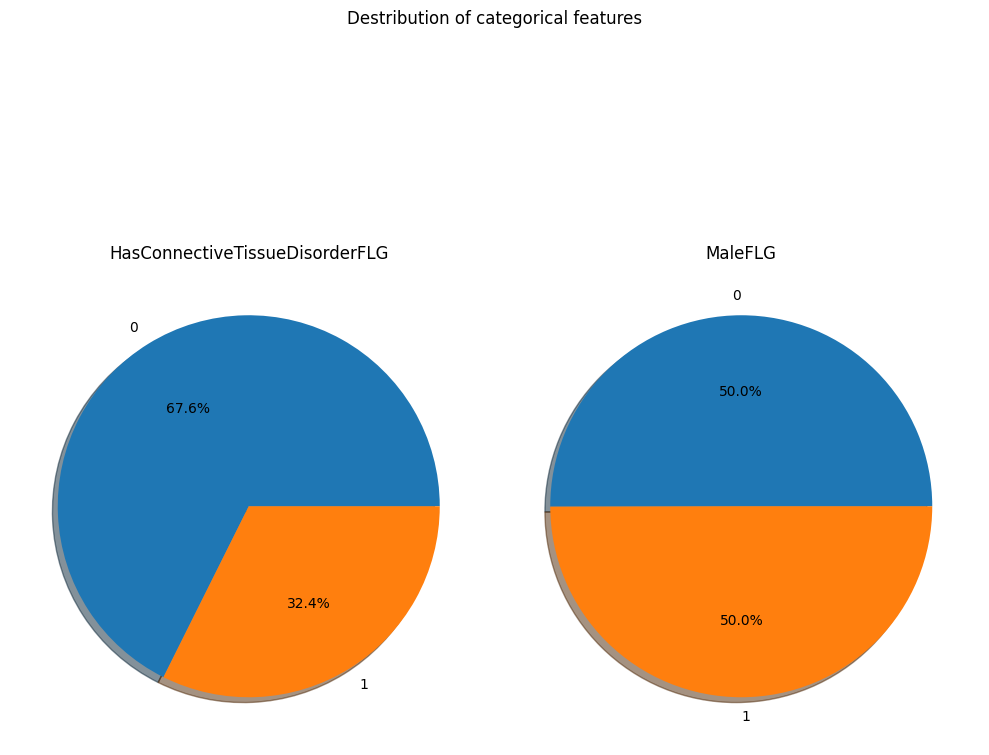

In [ ]:
cat_col_values = [0] * len(cat_cols)
for i in range(len(cat_cols)):
    cat_col_values[i] = [j for j in df[cat_cols[i]].value_counts()]

cat_col_labels = [0] * len(cat_cols)
for i in range(len(cat_cols)):
    cat_col_labels[i] = set(df[cat_cols[i]].tolist())

fig, ax = plt.subplots(1, 2, figsize=(10,10))
fig.suptitle('Destribution of categorical features')

for i in range(2):
        ax[i].pie(cat_col_values[i], labels=cat_col_labels[i], autopct='%.1f%%', shadow=True, radius=1)
        ax[i].set_title(cat_cols[i])

plt.tight_layout()
plt.show()

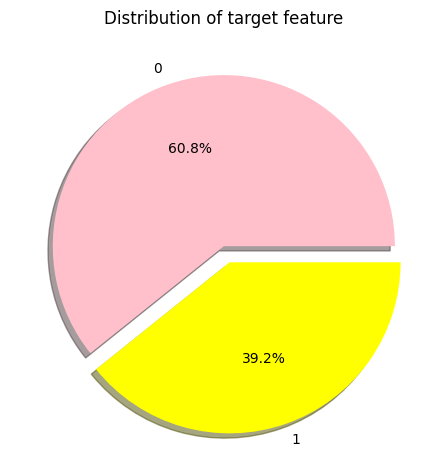

In [ ]:
target_values = [j for j in df[target_col].value_counts()]
target_labels = set(df[target_col].tolist())
colors = ['pink', 'yellow']
plt.pie(target_values, labels=target_labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1], colors=colors)
plt.title('Distribution of target feature')
plt.tight_layout()
plt.show()

# Correlation:

In [ ]:
corr = df[num_cols].corr()

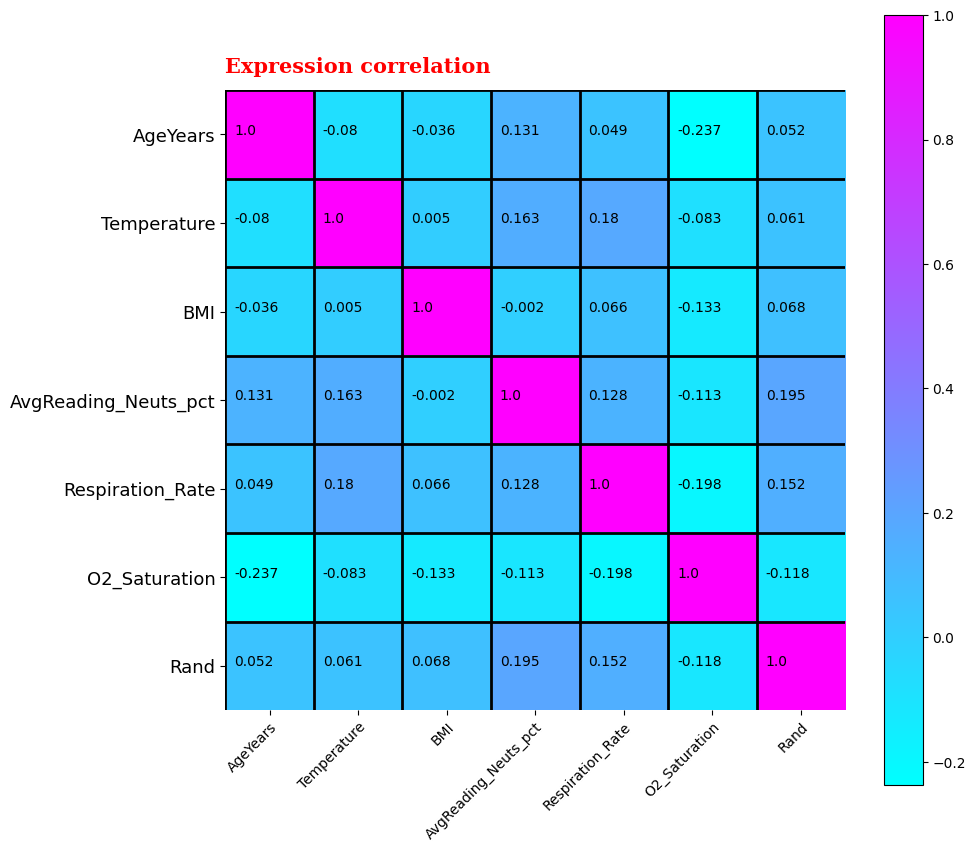

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
cmap = plt.get_cmap('cool')
im = ax.imshow(corr, cmap=cmap)

loc, labels = np.arange(len(num_cols)), list(num_cols)

# Create ticks
ax.set_xticks(loc)
ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")

ax.set_yticks(loc)
ax.set_yticklabels(labels, fontsize=13)

# label cells
for i in loc:
  for j in loc:
    value = corr.iloc[i, j]
    ax.text(i-0.4,j,round(value,3))

# Disable spines
for s in ax.spines.values():
  s.set_visible(False)

# Add minor ticks
ax.set_xticks(loc - 0.5, minor=True)
ax.set_yticks(loc - 0.5, minor=True)

# And create a grid based on them
ax.grid(which='minor', lw=2, color='black')
ax.tick_params(which="minor", bottom=False, left=False)
title = {
    'color' : 'red',
    'family' : 'serif',
    'weight' : 'bold',
    'size' : 15
}
ax.text(-0.5,-0.7,'Expression correlation', fontdict=title)
# Colorbar to visualize the cmap
fig.colorbar(im, ax=ax)

fig.show()

# There is no problem of multicollinearity

# Now let's train the model and find the most significant feature:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = df[feature_cols]
y = df[target_col]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
scaler = StandardScaler()

scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [12]:
X_train.head(5)

,AgeYears,Temperature,BMI,AvgReading_Neuts_pct,Respiration_Rate,O2_Saturation,Rand,HasConnectiveTissueDisorderFLG,MaleFLG
2897,-1.707114,0.127758,0.655106,0.142958,-0.299954,1.186259,1.278725,1,1
5968,1.680642,-0.926302,0.429839,-0.241402,-1.813707,-0.042363,-0.627833,0,0
1968,0.265295,0.223582,0.852840,-0.936205,0.132546,-0.861445,-0.655993,1,0
831,1.152466,0.031935,-0.333566,-0.056613,0.997548,-0.861445,-0.487217,1,0
2351,0.269421,0.223582,0.179542,0.416444,-0.083704,-0.042363,0.693978,0,1


## Custom ROC-AUC plot function

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(y_test_true, y_test_pred_probs, y_train_true=None, y_train_pred_probs=None):
    """
    Рисует ступенчатую ROC-AUC кривую для данных обучения и тестирования с заполненной областью под ней.

    Параметры:
     - y_train_true: Настоящие метки классов для данных обучения.
     - y_train_pred_probs: Предсказанные вероятности принадлежности к классу 1 для данных обучения.
     - y_test_true: Настоящие метки классов для данных тестирования.
     - y_test_pred_probs: Предсказанные вероятности принадлежности к классу 1 для данных тестирования.
    """
    if y_train_true is not None:
      fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred_probs)
      roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred_probs)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8, 6))

    if y_train_true is not None:
      plt.step(fpr_train, tpr_train, color='red', lw=1, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
      plt.fill_between(fpr_train, tpr_train, color='pink', alpha=0.75)

    plt.step(fpr_test, tpr_test, color='green', lw=1, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
    plt.fill_between(fpr_test, tpr_test, color='lightgreen', alpha=0.75)

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Let's find the best C hyperparameter value

In [14]:
grid = {
    'C': [1000, 100, 10, 1, 0.1, 0.01],
}

grid = GridSearchCV(LogisticRegression(), grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01]},
             scoring='roc_auc')

In [15]:
grid.best_params_

{'C': 0.1}

## Fit model

In [17]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [18]:
train_proba = model.predict_proba(X_train)
test_proba = model.predict_proba(X_test)

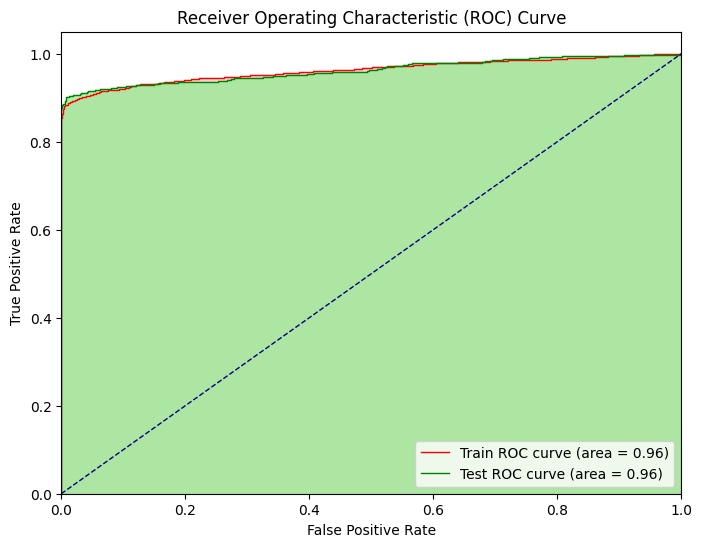

In [19]:
plot_roc_auc(y_test, test_proba[:,1], y_train, train_proba[:,1])

## Amazing results. Let's find the most significant feature:

In [20]:
print('Pure Logistic Regression model weights:\n')
for i in range(len(feature_cols)):
  print(f'[{round(model.coef_[0][i], 3)}] is weigth front of [{feature_cols[i]}]')
print(f'\nbias is {model.intercept_}')

Pure Logistic Regression model weights:

[0.002] is weigth front of [AgeYears]
[0.021] is weigth front of [Temperature]
[0.016] is weigth front of [BMI]
[0.382] is weigth front of [AvgReading_Neuts_pct]
[0.182] is weigth front of [Respiration_Rate]
[-0.183] is weigth front of [O2_Saturation]
[5.196] is weigth front of [Rand]
[0.265] is weigth front of [HasConnectiveTissueDisorderFLG]
[0.149] is weigth front of [MaleFLG]

bias is [0.82420502]


## It's RAND. And it seems like rand is single important feature, cuz other coef.values is near zero. Let's remove RAND from data, and refit model:

In [21]:
features_except_rand = [x for x in feature_cols if x != 'Rand']
nums_except_rand = [x for x in num_cols if x != 'Rand']

X_wo_rand = df[features_except_rand]
#y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X_wo_rand, y, train_size=0.8, random_state=42)

In [22]:
scaler.fit(X_train[nums_except_rand])
X_train[nums_except_rand] = scaler.transform(X_train[nums_except_rand])
X_test[nums_except_rand] = scaler.transform(X_test[nums_except_rand])

In [23]:
grid = {
    'C': [1000, 100, 10, 1, 0.1, 0.01],
}

grid = GridSearchCV(LogisticRegression(), grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1}

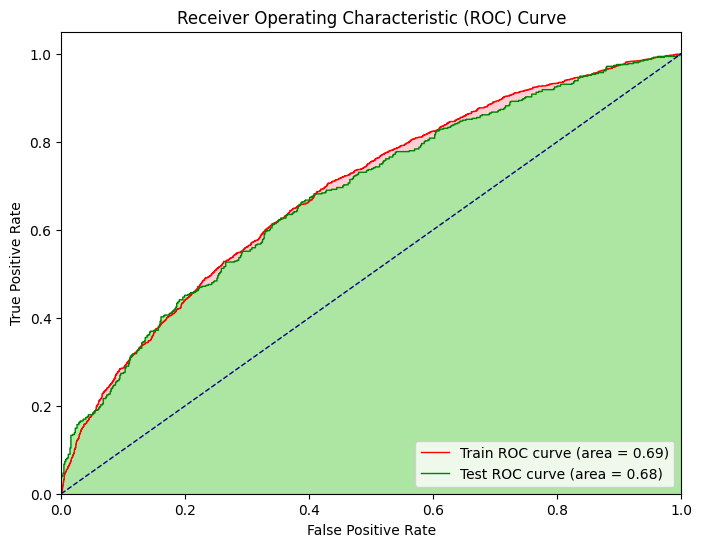

In [24]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

train_proba = model.predict_proba(X_train)
test_proba = model.predict_proba(X_test)

plot_roc_auc(y_test, test_proba[:,1], y_train, train_proba[:,1])

In [25]:
print('Pure Logistic Regression model weights:\n')
for i in range(len(features_except_rand)):
  print(f'[{round(model.coef_[0][i], 3)}] is weigth front of [{features_except_rand[i]}]')
print(f'\nbias is {model.intercept_}')

Pure Logistic Regression model weights:

[0.024] is weigth front of [AgeYears]
[-0.003] is weigth front of [Temperature]
[0.113] is weigth front of [BMI]
[0.482] is weigth front of [AvgReading_Neuts_pct]
[0.265] is weigth front of [Respiration_Rate]
[-0.218] is weigth front of [O2_Saturation]
[0.416] is weigth front of [HasConnectiveTissueDisorderFLG]
[0.113] is weigth front of [MaleFLG]

bias is [-0.69444851]


## Result without rand is disappointing. Score fall down from 0.96 to 0.68. Predictive force is not sufficient. There are not important feature to predict target value except RAND. Without rand the most signficant features are AvgReading_Neuts_pct and HasConnectiveTissueDisorderFLG.